In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

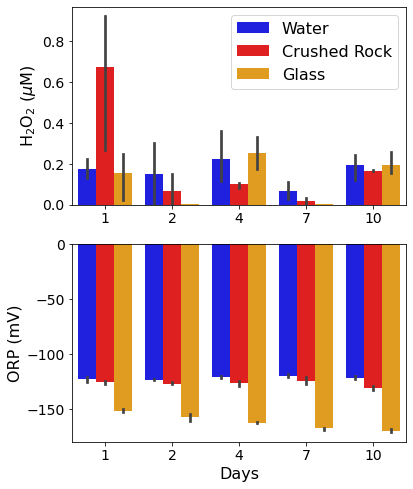

In [2]:
df = pd.read_csv("Data/IncubationResults_Metadata.csv",sep=";",header=0)
mf = pd.read_csv("Data/barplot_mapping_file.csv",header=0)
sulfate=pd.read_csv("Data/sulfate_concentration.csv",header=0)
mf.columns = ['Sample','RID']


df = pd.merge(df,sulfate,on='Sample')

df['sulfate_mM'] = df['Sulfate_ppm'] * 0.01041
df['Experiment'] = df['Experiment'].replace('RockAnoxic', 'Crushed Rock')

myColors = {'Water':'blue','Crushed Rock':'red','Glass':'orange'}

df.loc[df['H2O2']<0, 'H2O2'] = 0.005

fig,axs = plt.subplots(2, 1, figsize=(6, 8))
# plt.rcParams.update({'font.size': 14})

df.Time = (df.Time / 24).astype(int)
sns.barplot(x='Time', y='H2O2', hue='Experiment', data=df, ax=axs[0], palette=myColors, hue_order=['Water', 'Crushed Rock', 'Glass'])
axs[0].set_ylabel('H$_2$O$_2$ ($\mu$M)')
axs[0].set_xlabel('')



sns.barplot(x='Time', y='ORP', hue='Experiment', data=df, ax=axs[1], palette=myColors, hue_order=['Water', 'Crushed Rock', 'Glass'])
axs[1].get_legend().remove()
axs[1].set_ylabel('ORP (mV)')
axs[1].set_xlabel('Days')

for ax in axs:
    ax.tick_params(axis='both', labelsize=14)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)

axs[0].legend(fontsize=16)

